# Team 4 - TED Talks

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)

## Context
The dataset contain information about all video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017. The TED main dataset contains information about all talks including number of views, number of comments, descriptions, speakers and titles.

#Import and load data

## Import Module

In [ ]:
# Start your codes here!
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                 
import json
import ast
import collections
import wordcloud
from google.colab import auth

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.expand_frame_repr', False)
pd.options.display.float_format = '{:,.2f}'.format
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("whitegrid")
#pd.set_option('display.width', 1000)

auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
#Cleaning Function
def outlinerDelete (dataframe):
  Q1 = dataframe.quantile(0.25)
  Q3 = dataframe.quantile(0.75)
  IQR = Q3 - Q1
  return dataframe[(df_normalize > (Q1 - 1.5 * IQR)) & (df_normalize < (Q3 + 1.5 * IQR))]

def stringToList (data):
  words = [';',',','and ','+']
  for word in words:
    #print (data.split(word))
    result = [x.strip() for x in data.split(word)]
    if len(result) > 1:
      break
  return result

def occpupationToList (data):
  words = [';',',','and ','+']
  for word in words:
    #print (data.split(word))
    result = [x.strip() for x in data.split(word)]
    if len(result) > 1:
      break
  return result

# Pie Chart of Speaker Occupation
def extractElement_fromlist (serie):
  result = []
  for i in serie:
    result.extend(i)
    #print (i)
  return result  

#Date Difference
def days_between(d1, d2):
    d1 = datetime.datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

#Create World Cloud
def createWordCloud (text):
  occurrences = collections.Counter(text)
  cloud = wordcloud.WordCloud(background_color="white", width=1920, height=1080, min_font_size=8)
  cloud.generate_from_frequencies(occurrences)
  myimage = cloud.to_array()
  plt.imshow(myimage, interpolation = 'nearest')
  plt.axis('off')
  plt.show()

## Loading Dataframe

In [ ]:
%%bigquery --project optical-scarab-285012
SELECT * FROM `optical-scarab-285012.ted_talk.Ted_Talk` LIMIT 100

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,146,"In this archival footage from BBC TV, celebrat...",3955,BBC TV,426531600,0,Richard Feynman,Richard Feynman: Physics is fun to imagine,1,1267631820,"[{'id': 8, 'name': 'Informative', 'count': 324...","[{'id': 194, 'hero': 'https://pe.tedcdn.com/im...",Physicist,"['astronomy', 'physics', 'science']",Physics is fun to imagine,https://www.ted.com/talks/richard_feynman\n,521974
1,145,Adam Savage walks through two spectacular exam...,452,TED-Ed,1320192000,0,Adam Savage,Adam Savage: How simple ideas lead to scientif...,1,1331665352,"[{'id': 8, 'name': 'Informative', 'count': 655...","[{'id': 1385, 'hero': 'https://pe.tedcdn.com/i...","Maker, critical thinker","['Nobel prize', 'Planets', 'TED-Ed', 'ancient ...",How simple ideas lead to scientific discoveries,https://www.ted.com/talks/how_simple_ideas_lea...,877096
2,126,What color is a mirror? How much does a video ...,441,TED-Ed,1362009600,0,Michael Stevens,Michael Stevens: How much does a video weigh?,1,1366815569,"[{'id': 22, 'name': 'Fascinating', 'count': 17...","[{'id': 1386, 'hero': 'https://pe.tedcdn.com/i...",YouTube educator,"['Internet', 'TED-Ed', 'computers', 'humor', '...",How much does a video weigh?,https://www.ted.com/talks/how_much_does_a_vide...,195899
3,76,New videography techniques have opened up the ...,362,TED-Ed,1333324800,0,Tierney Thys + Plankton Chronicles Project,Tierney Thys + Plankton Chronicles Project: T...,2,1333378959,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 1...","[{'id': 126, 'hero': 'https://pe.tedcdn.com/im...",Marine biologist,"['TED-Ed', 'oceans']",The secret life of plankton,https://www.ted.com/talks/the_secret_life_of_p...,197120
4,428,TED curator Chris Anderson shares his obsessio...,728,TED-Ed,1331510400,0,Chris Anderson (TED),Chris Anderson (TED): Questions no one knows t...,1,1331578904,"[{'id': 21, 'name': 'Unconvincing', 'count': 6...","[{'id': 955, 'hero': 'https://pe.tedcdn.com/im...",TED Curator,"['Planets', 'String theory', 'TED-Ed', 'consci...",Questions no one knows the answers to,https://www.ted.com/talks/questions_no_one_kno...,659450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,64,Design legend Niels Diffrient talks about his ...,1040,TED2002,1012608000,20,Niels Diffrient,Niels Diffrient: Rethinking the way we sit down,1,1240298160,"[{'id': 9, 'name': 'Ingenious', 'count': 137},...","[{'id': 414, 'hero': 'https://pe.tedcdn.com/im...",Designer,"['business', 'design', 'technology', 'work']",Rethinking the way we sit down,https://www.ted.com/talks/niels_diffrient_reth...,554650
96,99,"Mae Jemison is an astronaut, a doctor, an art ...",888,TED2002,1012608000,20,Mae Jemison,Mae Jemison: Teach arts and sciences together,1,1241485200,"[{'id': 24, 'name': 'Persuasive', 'count': 126...","[{'id': 66, 'hero': 'https://pe.tedcdn.com/ima...","Astronaut, engineer, entrepreneur, physician a...","['art', 'dance', 'education', 'future', 'scien...",Teach arts and sciences together,https://www.ted.com/talks/mae_jemison_on_teach...,744257
97,39,In a wildly entertaining discussion with Richa...,1320,TED2002,1014854400,23,Frank Gehry,"Frank Gehry: A master architect asks, Now what?",1,1200528660,"[{'id': 25, 'name': 'OK', 'count': 139}, {'id'...","[{'id': 231, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'business', 'creativity', 'cu...","A master architect asks, Now what?",https://www.ted.com/talks/frank_gehry_asks_the...,959382
98,20,"In this captivating talk from the TED archive,...",671,TED2002,1014854400,24,Ben Katchor,Ben Katchor: Comics of bygone New York,1,1240437060,"[{'id': 9, 'name': 'Ingenious', 'count': 13}, ...","[{'id': 432, 'hero': 'https://pe.tedcdn.com/im...",Cartoonist,"['New York', 'art', 'books', 'cities', 'comedy...",Comics of bygone New York,https://www.ted.com/talks/ben_katchor_s_comics...,294396


In [ ]:
df = pd.read_gbq('SELECT * FROM `optical-scarab-285012.ted_talk.Ted_Talk`', project_id='optical-scarab-285012')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

**Schema:**
* name: The unique name of the TED Talk. Includes the title and the speaker.
* title: the title of the talk
* main_speaker: name of main speaker
* description: A summary of what the talk is about
* speaker_occupation: The occupation of the main speaker.
* num_speaker: The number of speakers in the talk.
* duration: The duration of the talk in seconds.
* event: The event where the talk took place.
* film_date: The Unix timestamp of the filming.
* published_date: The Unix timestamp for the publication of the talk on TED.com
* **comments: The number of first level comments made on the talk.**
* tags: The talk's content, identify by tags
* languages: The number of languages in which the transcript of the talk is availabel
* ratings: A stringified dictionary of the various ratings given to the talk (maybe it is being classified based on comment keywords)
* related_talks: A list of dictionaries of recommended talks to watch next.
* url: The URL of the talk.
* **views: The number of views on the talk on TED Website**


In [ ]:
df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,"2,550.00","2,550.00","2,550.00","2,550.00","2,550.00","2,550.00","2,550.00"
mean,191.56,826.51,"1,321,927,552.05",27.33,1.03,"1,343,525,265.75","1,698,297.48"
std,282.32,374.01,"119,739,059.70",9.56,0.21,"94,640,090.80","2,498,479.37"
min,2.00,135.00,"74,649,600.00",0.00,1.00,"1,151,367,060.00","50,443.00"
25%,63.00,577.00,"1,257,465,600.00",23.00,1.00,"1,268,462,970.00","755,792.75"
50%,118.00,848.00,"1,333,238,400.00",28.00,1.00,"1,340,935,446.50","1,124,523.50"
75%,221.75,"1,046.75","1,412,964,000.00",33.00,1.00,"1,423,432,130.25","1,700,759.50"
max,"6,404.00","5,256.00","1,503,792,000.00",72.00,5.00,"1,506,092,422.00","47,227,110.00"


In [ ]:
#convert time into date format
df['published_year'] = df['published_date'].apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y'))
df['published_month'] = df['published_date'].apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y%m'))
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
# Time problem. Older videos exist for a long time so many people can view it more than newer videos.
df['days_since_published'] = df['published_date'].apply(lambda x: days_between(x, '2017-09-21'))
df['view_per_day'] = df.apply(lambda x: 0 if x['days_since_published'] == 0 else round(x['views']/x['days_since_published'],0), axis = 1)

In [ ]:
df.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,published_year,published_month,days_since_published,view_per_day
0,146,"In this archival footage from BBC TV, celebrat...",3955,BBC TV,1983-07-08,0,Richard Feynman,Richard Feynman: Physics is fun to imagine,1,2010-03-03,"[{'id': 8, 'name': 'Informative', 'count': 324...","[{'id': 194, 'hero': 'https://pe.tedcdn.com/im...",Physicist,"['astronomy', 'physics', 'science']",Physics is fun to imagine,https://www.ted.com/talks/richard_feynman\n,521974,2010,201003,2759,189.00
1,145,Adam Savage walks through two spectacular exam...,452,TED-Ed,2011-11-02,0,Adam Savage,Adam Savage: How simple ideas lead to scientif...,1,2012-03-13,"[{'id': 8, 'name': 'Informative', 'count': 655...","[{'id': 1385, 'hero': 'https://pe.tedcdn.com/i...","Maker, critical thinker","['Nobel prize', 'Planets', 'TED-Ed', 'ancient ...",How simple ideas lead to scientific discoveries,https://www.ted.com/talks/how_simple_ideas_lea...,877096,2012,201203,2018,435.00
2,126,What color is a mirror? How much does a video ...,441,TED-Ed,2013-02-28,0,Michael Stevens,Michael Stevens: How much does a video weigh?,1,2013-04-24,"[{'id': 22, 'name': 'Fascinating', 'count': 17...","[{'id': 1386, 'hero': 'https://pe.tedcdn.com/i...",YouTube educator,"['Internet', 'TED-Ed', 'computers', 'humor', '...",How much does a video weigh?,https://www.ted.com/talks/how_much_does_a_vide...,195899,2013,201304,1611,122.00


In [ ]:
#Extract related video from nested JSON
%%bigquery --project optical-scarab-285012
SELECT
  a.name,
  JSON_EXTRACT_SCALAR(b, '$.id') as related_id,
  JSON_EXTRACT_SCALAR(b, '$.hero') as hero_img,
  JSON_EXTRACT_SCALAR(b, '$.speaker') as related_speaker,
  JSON_EXTRACT_SCALAR(b, '$.title') as related_title,
  JSON_EXTRACT_SCALAR(b, '$.duration') as related_duration,
  JSON_EXTRACT_SCALAR(b, '$.slug') as slug,
  JSON_EXTRACT_SCALAR(b, '$.viewed_count') as related_viewed_count
FROM
  `optical-scarab-285012.ted_talk.Ted_Talk` a,
  UNNEST(JSON_EXTRACT_ARRAY(a.related_talks,'$')) b

,name,related_id,hero_img,related_speaker,related_title,related_duration,slug,related_viewed_count
0,Richard Feynman: Physics is fun to imagine,194,https://pe.tedcdn.com/images/ted/21474_480x360...,Murray Gell-Mann,"Beauty, truth and ... physics?",962,murray_gell_mann_on_beauty_and_truth_in_physics,1181702
1,Adam Savage: How simple ideas lead to scientif...,1385,https://pe.tedcdn.com/images/ted/d060a40289ad4...,Greg Gage,The cockroach beatbox,376,the_cockroach_beatbox,303986
2,Adam Savage: How simple ideas lead to scientif...,1387,https://pe.tedcdn.com/images/ted/28d1ed375f3af...,David Gallo,Deep ocean mysteries and wonders,508,deep_ocean_mysteries_and_wonders,277544
3,Adam Savage: How simple ideas lead to scientif...,1386,https://pe.tedcdn.com/images/ted/f02132f12cdc6...,Chris Anderson (TED),Questions no one knows the answers to,728,questions_no_one_knows_the_answers_to,659450
4,Michael Stevens: How much does a video weigh?,1386,https://pe.tedcdn.com/images/ted/f02132f12cdc6...,Chris Anderson (TED),Questions no one knows the answers to,728,questions_no_one_knows_the_answers_to,659454
...,...,...,...,...,...,...,...,...
15005,Peter Haas: Haiti's disaster of engineering,2,https://pe.tedcdn.com/images/ted/1451_480x360.jpg,Amy Smith,Simple designs to save a life,906,amy_smith_shares_simple_lifesaving_design,1415766
15006,Peter Haas: Haiti's disaster of engineering,1809,https://pe.tedcdn.com/images/ted/a4da6c5872cc6...,Shigeru Ban,Emergency shelters made from paper,702,shigeru_ban_emergency_shelters_made_from_paper,1573424
15007,Peter Haas: Haiti's disaster of engineering,2183,https://pe.tedcdn.com/images/ted/6c23c76e0033c...,Marc Kushner,Why the buildings of the future will be shaped...,1085,marc_kushner_why_the_buildings_of_the_future_w...,2780416
15008,Peter Haas: Haiti's disaster of engineering,231,https://pe.tedcdn.com/images/ted/33968_480x360...,Frank Gehry,My days as a young rebel,2678,frank_gehry_as_a_young_rebel,620811


In [ ]:
df_related = pd.read_gbq('''SELECT * FROM `optical-scarab-285012.ted_talk.Ted_Related`''', project_id='optical-scarab-285012') 

In [ ]:
#Extract nested rating
%%bigquery --project optical-scarab-285012
SELECT
  a.name,
  JSON_EXTRACT_SCALAR(b, '$.id') as rating_id,
  JSON_EXTRACT_SCALAR(b, '$.name') as rating_name,
  CAST(JSON_EXTRACT_SCALAR(b, '$.count') as INT64) as rating_count
FROM
  `optical-scarab-285012.ted_talk.Ted_Talk` a,
  UNNEST(JSON_EXTRACT_ARRAY(a.ratings,'$')) b

,name,rating_id,rating_name,rating_count
0,Richard Feynman: Physics is fun to imagine,8,Informative,324
1,Richard Feynman: Physics is fun to imagine,22,Fascinating,362
2,Richard Feynman: Physics is fun to imagine,10,Inspiring,306
3,Richard Feynman: Physics is fun to imagine,1,Beautiful,163
4,Richard Feynman: Physics is fun to imagine,9,Ingenious,134
...,...,...,...,...
35695,Peter Haas: Haiti's disaster of engineering,21,Unconvincing,4
35696,Peter Haas: Haiti's disaster of engineering,23,Jaw-dropping,13
35697,Peter Haas: Haiti's disaster of engineering,1,Beautiful,6
35698,Peter Haas: Haiti's disaster of engineering,2,Confusing,1


In [ ]:
df_ratings = pd.read_gbq('''SELECT * FROM `optical-scarab-285012.ted_talk.Ted_Ratings`''', project_id='optical-scarab-285012') 

In [ ]:
#Extract nested tags
%%bigquery --project optical-scarab-285012
SELECT
  a.name,
  tag
FROM
  `optical-scarab-285012.ted_talk.Ted_Talk` a,
  UNNEST(SPLIT(REGEXP_REPLACE(a.tags, r'[\' [\]"]', ''))) tag

,name,tag
0,Richard Feynman: Physics is fun to imagine,astronomy
1,Richard Feynman: Physics is fun to imagine,physics
2,Richard Feynman: Physics is fun to imagine,science
3,Adam Savage: How simple ideas lead to scientif...,Nobelprize
4,Adam Savage: How simple ideas lead to scientif...,Planets
...,...,...
19149,Peter Haas: Haiti's disaster of engineering,business
19150,Peter Haas: Haiti's disaster of engineering,disasterrelief
19151,Peter Haas: Haiti's disaster of engineering,globalissues
19152,Peter Haas: Haiti's disaster of engineering,naturaldisaster


In [ ]:
df_tags = pd.read_gbq('SELECT * FROM `optical-scarab-285012.ted_talk.Ted_Tags`', project_id='optical-scarab-285012') 

In [ ]:
%%bigquery --project optical-scarab-285012
SELECT * FROM `optical-scarab-285012.ted_talk.Ted_Talk` WHERE speaker_occupation is null

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,257,"As you surf the Web, information is being coll...",399,TED2012,1330473600,32,Gary Kovacs,Gary Kovacs: Tracking our online trackers,1,1336057219,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",None,"['Internet', 'advertising', 'business', 'priva...",Tracking our online trackers,https://www.ted.com/talks/gary_kovacs_tracking...,2098639
1,122,"The Pirate Party fights for transparency, anon...",1097,TEDxObserver,1331424000,10,Rick Falkvinge,Rick Falkvinge: I am a pirate,1,1333289675,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",None,"['Internet', 'TEDx', 'global issues', 'politic...",I am a pirate,https://www.ted.com/talks/rick_falkvinge_i_am_...,181010
2,48,What do you do with an outdated encyclopedia i...,366,TEDYouth 2014,1415059200,34,Brian Dettmer,Brian Dettmer: Old books reborn as art,1,1423238442,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",None,"['TEDYouth', 'art', 'books', 'creativity']",Old books reborn as art,https://www.ted.com/talks/brian_dettmer_old_bo...,1159937
3,145,"After a crisis, how can we tell if water is sa...",217,TEDGlobal 2011,1310601600,38,Sonaar Luthra,Sonaar Luthra: Meet the Water Canary,1,1326731605,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",None,"['TED Fellows', 'design', 'global development'...",Meet the Water Canary,https://www.ted.com/talks/sonaar_luthra_meet_t...,353749
4,70,Photographer Boniface Mwangi wanted to protest...,440,TEDGlobal 2014,1413763200,33,Boniface Mwangi,Boniface Mwangi: The day I stood up alone,1,1427989423,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",None,"['TED Fellows', 'activism', 'art', 'corruption...",The day I stood up alone,https://www.ted.com/talks/boniface_mwangi_boni...,1342431
5,140,"In this lovely talk, TED Fellow Ryan Holladay ...",389,TED@BCG San Francisco,1383091200,33,Ryan Holladay,Ryan Holladay: To hear this music you have to ...,1,1389369735,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",None,"['TED Fellows', 'entertainment', 'music', 'tec...",To hear this music you have to be there. Liter...,https://www.ted.com/talks/ryan_holladay_to_hea...,1284510


In [ ]:
# Replace null occupation with Unidentified
df['speaker_occupation'].fillna(value='Unidentified', inplace=True)
df[df.isna().any(axis=1)]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,published_year,published_month,days_since_published,view_per_day


In [ ]:
#Convert speaker occupation into list
df['speaker_occupation_list'] = df['speaker_occupation'].apply(occpupationToList)

In [ ]:
df.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,published_year,published_month,days_since_published,view_per_day,speaker_occupation_list,controverial_rate,controverial_category,views_category,growth_category,score
0,146,"In this archival footage from BBC TV, celebrat...",3955,BBC TV,1983-07-08,0,Richard Feynman,Richard Feynman: Physics is fun to imagine,1,2010-03-03,"[{'id': 8, 'name': 'Informative', 'count': 324...","[{'id': 194, 'hero': 'https://pe.tedcdn.com/im...",Physicist,"['astronomy', 'physics', 'science']",Physics is fun to imagine,https://www.ted.com/talks/richard_feynman\n,521974,2010,201003,2759,189.00,[Physicist],0.03,2,1,1,4
1,145,Adam Savage walks through two spectacular exam...,452,TED-Ed,2011-11-02,0,Adam Savage,Adam Savage: How simple ideas lead to scientif...,1,2012-03-13,"[{'id': 8, 'name': 'Informative', 'count': 655...","[{'id': 1385, 'hero': 'https://pe.tedcdn.com/i...","Maker, critical thinker","['Nobel prize', 'Planets', 'TED-Ed', 'ancient ...",How simple ideas lead to scientific discoveries,https://www.ted.com/talks/how_simple_ideas_lea...,877096,2012,201203,2018,435.00,"[Maker, critical thinker]",0.02,2,1,2,5
2,126,What color is a mirror? How much does a video ...,441,TED-Ed,2013-02-28,0,Michael Stevens,Michael Stevens: How much does a video weigh?,1,2013-04-24,"[{'id': 22, 'name': 'Fascinating', 'count': 17...","[{'id': 1386, 'hero': 'https://pe.tedcdn.com/i...",YouTube educator,"['Internet', 'TED-Ed', 'computers', 'humor', '...",How much does a video weigh?,https://www.ted.com/talks/how_much_does_a_vide...,195899,2013,201304,1611,122.00,[YouTube educator],0.06,3,1,1,5


# Dataset Discovery

## Distribution and Correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53c7dc3ac8>,
      dtype=object)

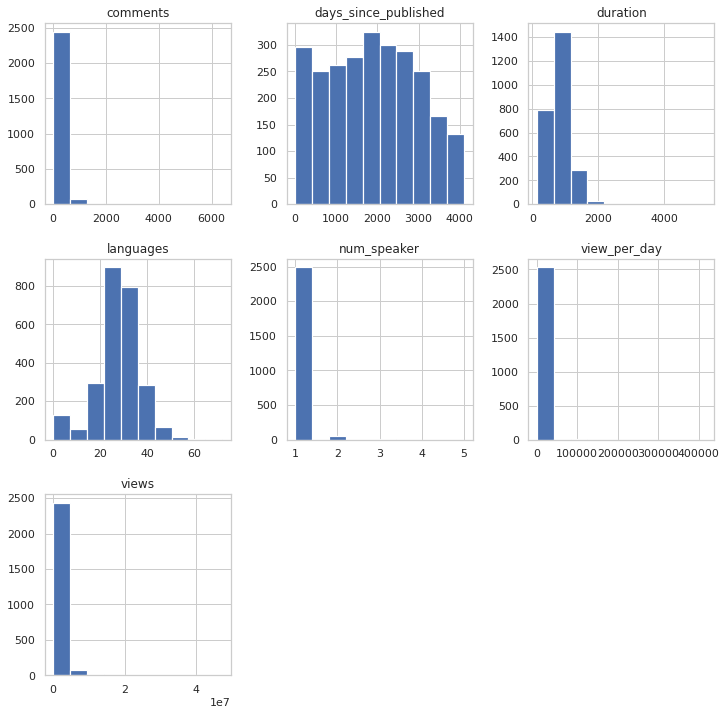

In [ ]:
df.hist(linewidth=1.2, figsize=(12, 12))

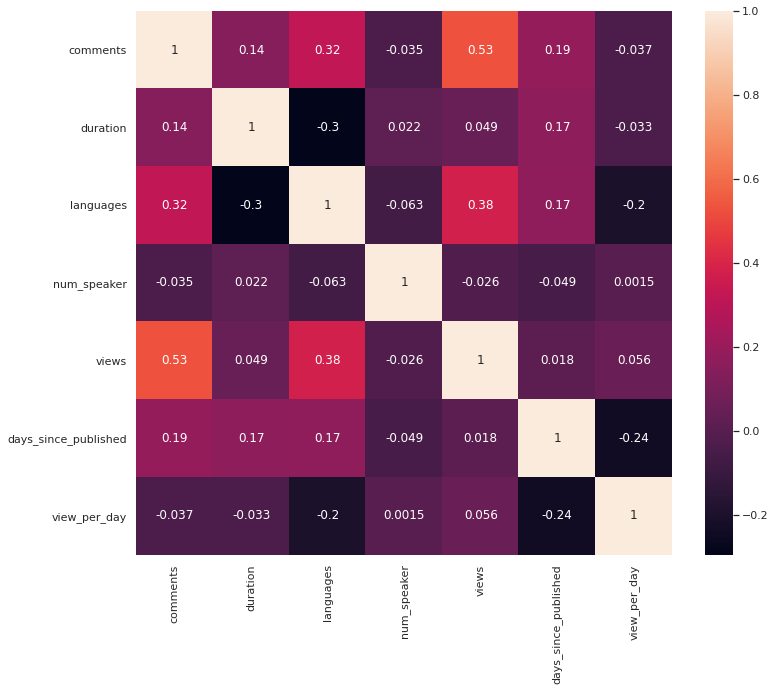

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)

Number of Views is likely to correlated with languages(0.38) and comments(0.53)

## TED Talk statistic

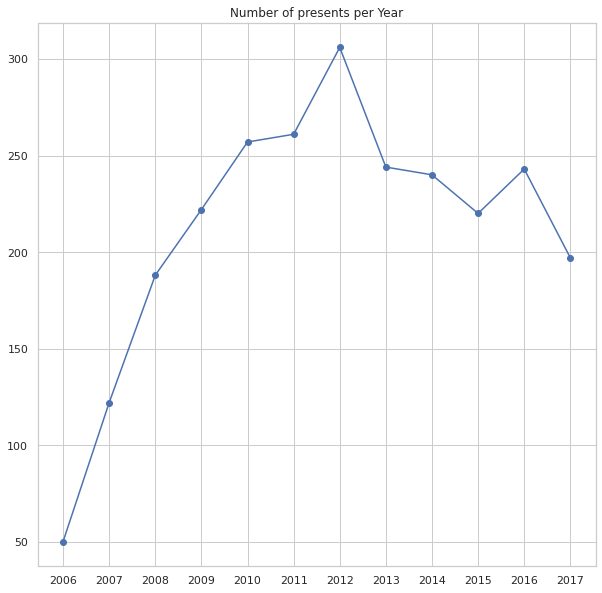

In [ ]:
#number of Event per year
df_groupbyYear = df.groupby('published_year').count()
#display(df_groupbyYear)
fig, ax = plt.subplots(figsize=(10,10))
#fig.suptitle("plots")

ax.plot('event', data = df_groupbyYear, marker = 'o')
ax.set_title("Number of presents per Year")
ax.set_xticks(df_groupbyYear.index)

#plt.legend()
plt.show()

The data include ted talk from 2006 to 2017. TED have highest numbers of talk in 2012

In [ ]:
#Most viewed talks
df[['name', 'event', 'languages', 'comments', 'views', 'view_per_day']].sort_values(by=['views'], ascending=False).iloc[:10]

,name,event,languages,comments,views,view_per_day
206,Ken Robinson: Do schools kill creativity?,TED2006,60,4553,47227110,"11,508.00"
2010,Amy Cuddy: Your body language may shape who yo...,TEDGlobal 2012,51,2290,43155405,"23,764.00"
2331,Simon Sinek: How great leaders inspire action,TEDxPuget Sound,45,1930,34309432,"12,721.00"
1377,Brené Brown: The power of vulnerability,TEDxHouston,52,1927,31168150,"12,649.00"
429,Mary Roach: 10 things you didn't know about or...,TED2009,37,354,22270883,"7,312.00"
2028,Julian Treasure: How to speak so that people w...,TEDGlobal 2013,45,297,21594632,"18,270.00"
326,Jill Bolte Taylor: My stroke of insight,TED2008,49,2877,21190883,"6,089.00"
220,Tony Robbins: Why we do what we do,TED2006,36,672,20685401,"5,040.00"
2280,James Veitch: This is what happens when you re...,TEDGlobal>Geneva,43,150,20475972,"32,920.00"
2246,Cameron Russell: Looks aren't everything. Beli...,TEDxMidAtlantic,43,846,19787465,"11,578.00"


In [ ]:
# Most Controversial Talk
df['controverial_rate'] = 100*df['comments']/df['views'] #comment-to-view ratio
df[['name', 'event', 'languages', 'comments', 'views', 'view_per_day', 'controverial_rate']].sort_values(by=['controverial_rate'], ascending=False).iloc[:10,:]

,name,event,languages,comments,views,view_per_day,controverial_rate
2450,Diane J. Savino: The case for same-sex marriage,New York State Senate,0,649,292395,113.00,0.22
1849,David Bismark: E-voting without fraud,TEDGlobal 2010,36,834,543551,216.00,0.15
77,Richard Dawkins: Militant atheism,TED2002,42,6404,4374792,"1,148.00",0.15
498,Sharmeen Obaid-Chinoy: Inside a school for sui...,TED2010,32,1502,1057238,395.00,0.14
544,Janet Echelman: Taking imagination seriously,TED2011,35,2492,1832930,798.00,0.14
1392,Lesley Hazleton: On reading the Koran,TEDxRainier,35,2374,1847256,753.00,0.13
1557,Elizabeth Lindsey: Curating humanity's heritage,TEDWomen 2010,30,555,439180,183.00,0.13
813,David Chalmers: How do you explain consciousness?,TED2014,33,2673,2162764,"1,856.00",0.12
511,Michael Specter: The danger of science denial,TED2010,31,2272,1838628,676.00,0.12
1502,Mallika Sarabhai: Dance to change the world,TEDIndia 2009,23,595,481834,169.00,0.12


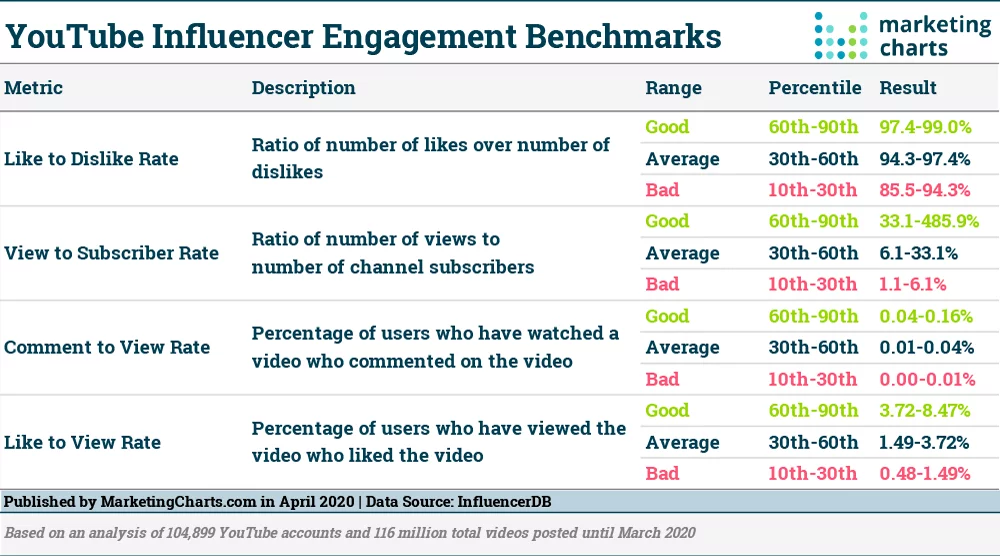

In [ ]:
# Generate Controversial Category
df['controverial_category'] = df['controverial_rate'].apply(lambda x: 3 if x > 0.04 else (2 if x > 0.01 else 1))
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,published_year,published_month,days_since_published,view_per_day,speaker_occupation_list,controverial_rate,controverial_category
0,146,"In this archival footage from BBC TV, celebrat...",3955,BBC TV,1983-07-08,0,Richard Feynman,Richard Feynman: Physics is fun to imagine,1,2010-03-03,"[{'id': 8, 'name': 'Informative', 'count': 324...","[{'id': 194, 'hero': 'https://pe.tedcdn.com/im...",Physicist,"['astronomy', 'physics', 'science']",Physics is fun to imagine,https://www.ted.com/talks/richard_feynman\n,521974,2010,201003,2759,189.00,[Physicist],0.03,2
1,145,Adam Savage walks through two spectacular exam...,452,TED-Ed,2011-11-02,0,Adam Savage,Adam Savage: How simple ideas lead to scientif...,1,2012-03-13,"[{'id': 8, 'name': 'Informative', 'count': 655...","[{'id': 1385, 'hero': 'https://pe.tedcdn.com/i...","Maker, critical thinker","['Nobel prize', 'Planets', 'TED-Ed', 'ancient ...",How simple ideas lead to scientific discoveries,https://www.ted.com/talks/how_simple_ideas_lea...,877096,2012,201203,2018,435.00,"[Maker, critical thinker]",0.02,2
2,126,What color is a mirror? How much does a video ...,441,TED-Ed,2013-02-28,0,Michael Stevens,Michael Stevens: How much does a video weigh?,1,2013-04-24,"[{'id': 22, 'name': 'Fascinating', 'count': 17...","[{'id': 1386, 'hero': 'https://pe.tedcdn.com/i...",YouTube educator,"['Internet', 'TED-Ed', 'computers', 'humor', '...",How much does a video weigh?,https://www.ted.com/talks/how_much_does_a_vide...,195899,2013,201304,1611,122.00,[YouTube educator],0.06,3
3,76,New videography techniques have opened up the ...,362,TED-Ed,2012-04-02,0,Tierney Thys + Plankton Chronicles Project,Tierney Thys + Plankton Chronicles Project: T...,2,2012-04-02,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 1...","[{'id': 126, 'hero': 'https://pe.tedcdn.com/im...",Marine biologist,"['TED-Ed', 'oceans']",The secret life of plankton,https://www.ted.com/talks/the_secret_life_of_p...,197120,2012,201204,1998,99.00,[Marine biologist],0.04,2
4,428,TED curator Chris Anderson shares his obsessio...,728,TED-Ed,2012-03-12,0,Chris Anderson (TED),Chris Anderson (TED): Questions no one knows t...,1,2012-03-12,"[{'id': 21, 'name': 'Unconvincing', 'count': 6...","[{'id': 955, 'hero': 'https://pe.tedcdn.com/im...",TED Curator,"['Planets', 'String theory', 'TED-Ed', 'consci...",Questions no one knows the answers to,https://www.ted.com/talks/questions_no_one_kno...,659450,2012,201203,2019,327.00,[TED Curator],0.06,3


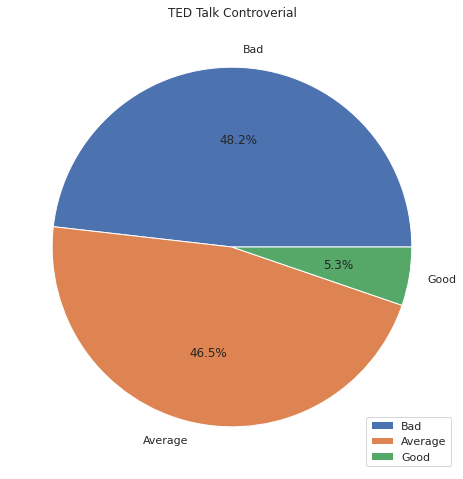

In [ ]:
plt.figure()
plt.pie(df.groupby('controverial_category').count().name.values,labels=["Bad", "Average", "Good"], autopct='%1.1f%%')
plt.legend(loc=4)
plt.title("TED Talk Controverial")
plt.show()

In [ ]:
df[['event', 'views']].groupby('event').sum().sort_values(['views'],ascending=False).head(10)

,views
event,
TED2013,177307937
TED2014,174121423
TEDGlobal 2013,170554736
TED2015,150826305
TED2006,147345533
TED2009,145656385
TEDGlobal 2012,145070549
TED2012,144497608
TED2016,139571905


Top 10 event that has the most viewed. TED2013 and TEDGlobal 2013 combined let 2013 is a very succesful year of Ted, so higher quantity of video do not mean higher views.

## TED Speaker

In [ ]:
#Top Speaker and their occupation
df[['main_speaker', 'speaker_occupation', 'views']].groupby(['main_speaker', 'speaker_occupation']).sum().sort_values(['views'],ascending=False)

,,views
main_speaker,speaker_occupation,
Ken Robinson,Author/educator,63006281
Amy Cuddy,Social psychologist,43155405
Simon Sinek,Leadership expert,41113370
Brené Brown,Vulnerability researcher,39157044
Julian Treasure,Sound consultant,30927659
...,...,...
José Bowen,Professor of music,117756
Aleph Molinari,"Economist, techno-activist",115346
Tim Birkhead,Ornithologist,112321


In [ ]:
df_speaker = df.groupby('main_speaker').agg({'name': 'count', 'views': 'sum', 'comments': 'sum'}).sort_values(['name'], ascending=False)
df_speaker['returned_speaker'] = df_speaker['name'].apply(lambda x: True if x > 1 else False)
df_speaker

,name,views,comments,returned_speaker
main_speaker,,,,
Hans Rosling,9,27567127,3085,True
Juan Enriquez,7,12559364,1384,True
Rives,6,9988660,773,True
Marco Tempest,6,13356940,951,True
Clay Shirky,5,6250431,1593,True
...,...,...,...,...
Hannah Brencher,1,1909462,197,False
Hanna Rosin,1,851862,831,False
Handspring Puppet Co.,1,1530711,102,False


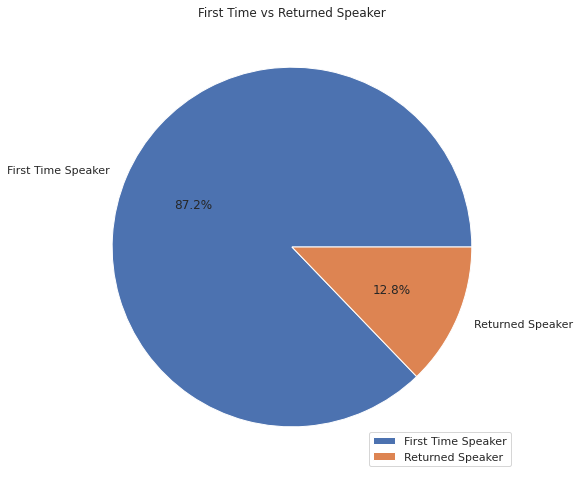

returned_speaker
False    1880
True      276
Name: name, dtype: int64

In [ ]:
plt.figure()
plt.pie(df_speaker.groupby('returned_speaker').count().name, labels=['First Time Speaker', 'Returned Speaker'], autopct='%1.1f%%')
plt.legend(loc=4)
plt.title("First Time vs Returned Speaker")
plt.show()
df_speaker.groupby('returned_speaker').count().name

## TED Tags

In [ ]:
df_tags.groupby('tag').count().sort_values(by=['name'], ascending=False)

,name
tag,
technology,727
science,567
globalissues,501
culture,486
TEDx,450
...,...
origami,2
cloud,1
funny,1


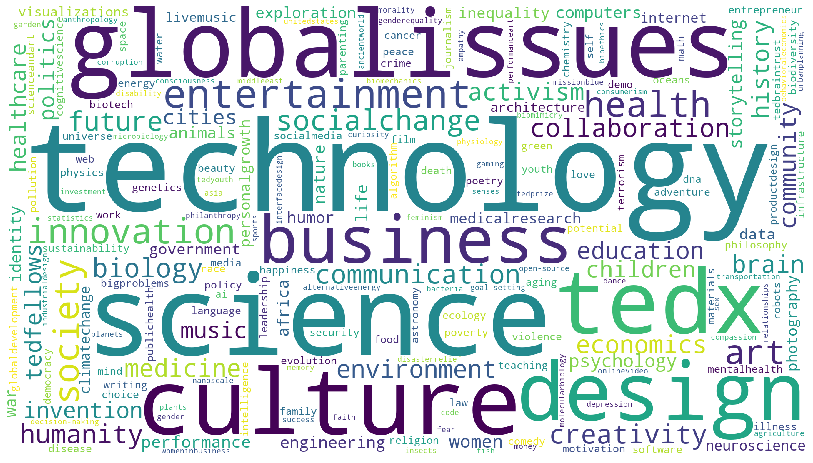

In [ ]:
# Most Freq Tags
tags_list = []
for i in df_tags['tag']:
  tags_list.append(i.lower())

createWordCloud(tags_list)

## TED Rating

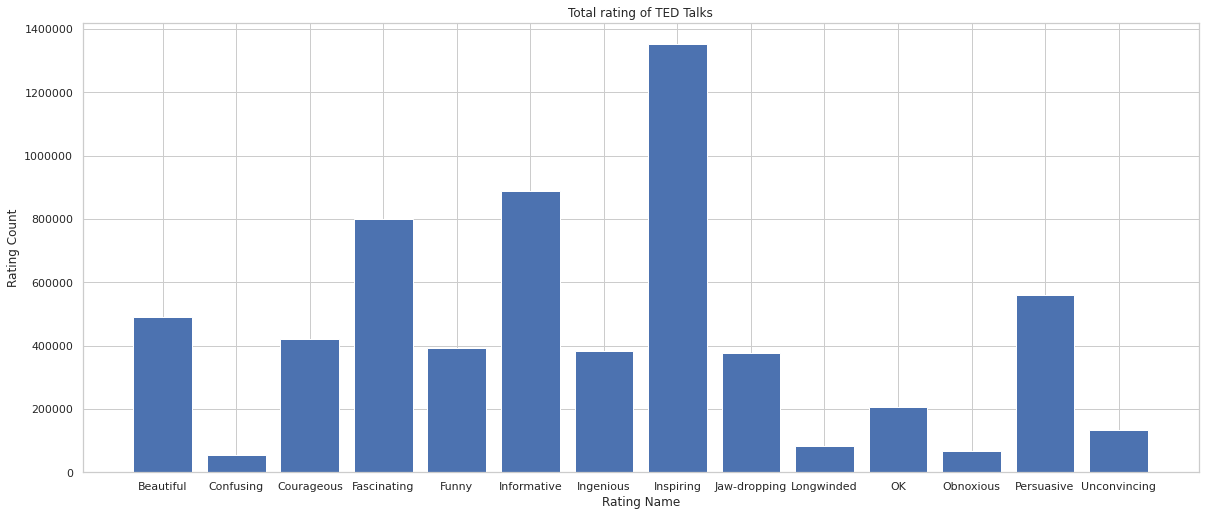

In [ ]:
rating_list = df_ratings.groupby('rating_name').sum().index.to_list()
rating_count = df_ratings.groupby('rating_name').sum()['rating_count']
plt.figure
plt.bar(rating_list, rating_count)
plt.xlabel("Rating Name")
plt.ylabel("Rating Count")
plt.title("Total rating of TED Talks")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



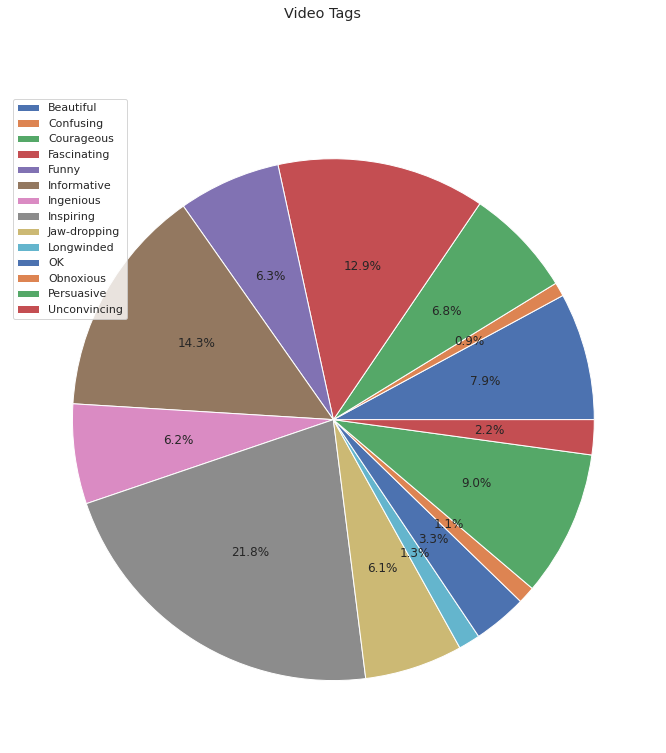

In [ ]:
rating = df_ratings.groupby('rating_name').sum()
fig, ax = plt.subplots(figsize=(12,12))
fig.suptitle("Video Tags")
ax.pie(rating, autopct='%1.1f%%')
plt.legend(rating.index)


## Metric for TED Talk
Focused on 3 metric:
- Volume: the total views of video
- Growth: Views per Days of video
- Controversial: comments-to-views ratio

In [ ]:
df['views_category'] = pd.qcut(df['views'], 3, labels=[1, 2, 3])
df['growth_category'] = pd.qcut(df['view_per_day'], 3, labels=[1, 2, 3])
df['score'] = df['views_category'].astype(int) + df['growth_category'].astype(int) + df['controverial_category'].astype(int)
df.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,published_year,published_month,days_since_published,view_per_day,speaker_occupation_list,controverial_rate,controverial_category,views_category,growth_category,score
0,146,"In this archival footage from BBC TV, celebrat...",3955,BBC TV,1983-07-08,0,Richard Feynman,Richard Feynman: Physics is fun to imagine,1,2010-03-03,"[{'id': 8, 'name': 'Informative', 'count': 324...","[{'id': 194, 'hero': 'https://pe.tedcdn.com/im...",Physicist,"['astronomy', 'physics', 'science']",Physics is fun to imagine,https://www.ted.com/talks/richard_feynman\n,521974,2010,201003,2759,189.00,[Physicist],0.03,2,1,1,4
1,145,Adam Savage walks through two spectacular exam...,452,TED-Ed,2011-11-02,0,Adam Savage,Adam Savage: How simple ideas lead to scientif...,1,2012-03-13,"[{'id': 8, 'name': 'Informative', 'count': 655...","[{'id': 1385, 'hero': 'https://pe.tedcdn.com/i...","Maker, critical thinker","['Nobel prize', 'Planets', 'TED-Ed', 'ancient ...",How simple ideas lead to scientific discoveries,https://www.ted.com/talks/how_simple_ideas_lea...,877096,2012,201203,2018,435.00,"[Maker, critical thinker]",0.02,2,1,2,5
2,126,What color is a mirror? How much does a video ...,441,TED-Ed,2013-02-28,0,Michael Stevens,Michael Stevens: How much does a video weigh?,1,2013-04-24,"[{'id': 22, 'name': 'Fascinating', 'count': 17...","[{'id': 1386, 'hero': 'https://pe.tedcdn.com/i...",YouTube educator,"['Internet', 'TED-Ed', 'computers', 'humor', '...",How much does a video weigh?,https://www.ted.com/talks/how_much_does_a_vide...,195899,2013,201304,1611,122.00,[YouTube educator],0.06,3,1,1,5
3,76,New videography techniques have opened up the ...,362,TED-Ed,2012-04-02,0,Tierney Thys + Plankton Chronicles Project,Tierney Thys + Plankton Chronicles Project: T...,2,2012-04-02,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 1...","[{'id': 126, 'hero': 'https://pe.tedcdn.com/im...",Marine biologist,"['TED-Ed', 'oceans']",The secret life of plankton,https://www.ted.com/talks/the_secret_life_of_p...,197120,2012,201204,1998,99.00,[Marine biologist],0.04,2,1,1,4
4,428,TED curator Chris Anderson shares his obsessio...,728,TED-Ed,2012-03-12,0,Chris Anderson (TED),Chris Anderson (TED): Questions no one knows t...,1,2012-03-12,"[{'id': 21, 'name': 'Unconvincing', 'count': 6...","[{'id': 955, 'hero': 'https://pe.tedcdn.com/im...",TED Curator,"['Planets', 'String theory', 'TED-Ed', 'consci...",Questions no one knows the answers to,https://www.ted.com/talks/questions_no_one_kno...,659450,2012,201203,2019,327.00,[TED Curator],0.06,3,1,1,5


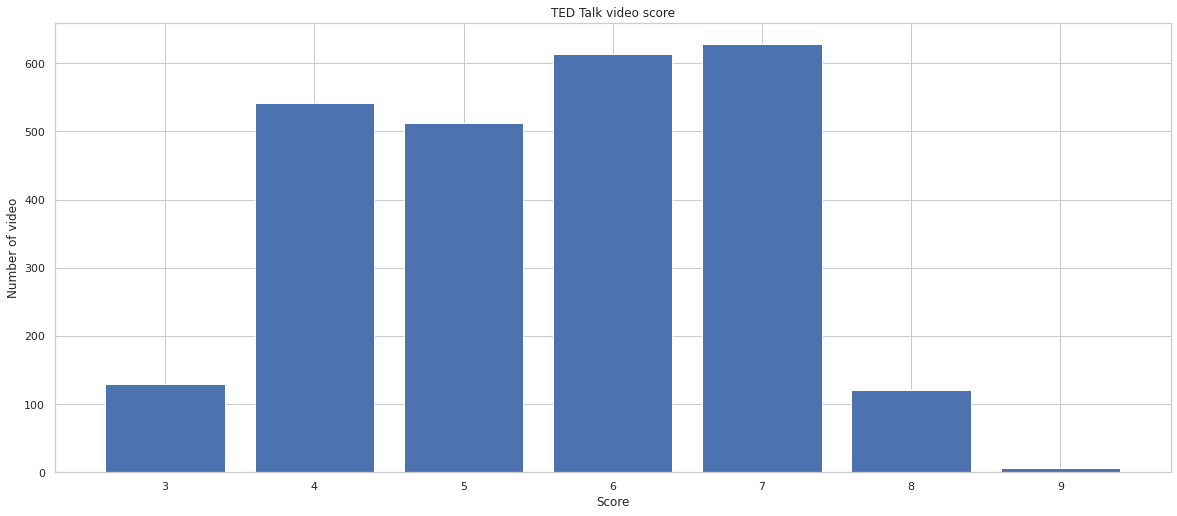

In [ ]:
score_list = df.groupby('score').count().index.to_list()
score_count = df.groupby('score').count()['name']
plt.figure
plt.bar(score_list, score_count)
plt.xlabel("Score")
plt.ylabel("Number of video")
plt.title("TED Talk video score")
plt.show()